In [2]:
# Importing necessary libraries
import pandas as pd

# Loading the data
# Assuming we start with the Sentences_50Agree.txt file for demonstration purposes
file_path = 'C:/Users/egeme/OneDrive/Masaüstü/NewProjects/NLP/Data/Sentences_AllAgree.txt'


# Reading the data
with open(file_path, 'r', encoding='iso-8859-1') as file:
    lines = file.readlines()

# Splitting sentences and labels based on the "@" delimiter
data = [line.strip().rsplit("@", 1) for line in lines]

# Creating a DataFrame
df = pd.DataFrame(data, columns=["sentence", "label"])

# Displaying basic information about the dataset
print(df.head())  # Displaying the first few rows
print(df.info())  # Displaying information about columns and data types

# Checking the distribution of labels
label_distribution = df['label'].value_counts()
print("Label Distribution:\n", label_distribution)


                                            sentence     label
0  According to Gran , the company has no plans t...   neutral
1  Technopolis plans to develop in stages an area...   neutral
2  The international electronic industry company ...  negative
3  With the new production plant the company woul...  positive
4  According to the company 's updated strategy f...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  4846 non-null   object
 1   label     4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB
None
Label Distribution:
 label
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64


In [3]:
# Converting all text to lowercase
df['sentence'] = df['sentence'].str.lower()
print(df.head())  # Displaying the first few rows to verify the change


                                            sentence     label
0  according to gran , the company has no plans t...   neutral
1  technopolis plans to develop in stages an area...   neutral
2  the international electronic industry company ...  negative
3  with the new production plant the company woul...  positive
4  according to the company 's updated strategy f...  positive


In [4]:
import re

# Removing punctuation
df['sentence'] = df['sentence'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
print(df.head())  # Displaying the first few rows to verify the change


                                            sentence     label
0  according to gran  the company has no plans to...   neutral
1  technopolis plans to develop in stages an area...   neutral
2  the international electronic industry company ...  negative
3  with the new production plant the company woul...  positive
4  according to the company s updated strategy fo...  positive


In [6]:
import nltk
from nltk.corpus import stopwords

# Download stop words if not already downloaded
nltk.download('stopwords')

# Defining stop words list
stop_words = set(stopwords.words('english'))

# Removing stop words
df['sentence'] = df['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
print(df.head())  # Displaying the first few rows to verify the change


                                            sentence     label
0  according gran company plans move production r...   neutral
1  technopolis plans develop stages area less 100...   neutral
2  international electronic industry company elco...  negative
3  new production plant company would increase ca...  positive
4  according company updated strategy years 20092...  positive


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\egeme\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [7]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

# Download necessary data if not already available
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatization function
df['sentence'] = df['sentence'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
print(df.head())  # Displaying the first few rows to verify the change


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\egeme\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\egeme\AppData\Roaming\nltk_data...


                                            sentence     label
0  according gran company plan move production ru...   neutral
1  technopolis plan develop stage area less 10000...   neutral
2  international electronic industry company elco...  negative
3  new production plant company would increase ca...  positive
4  according company updated strategy year 200920...  positive


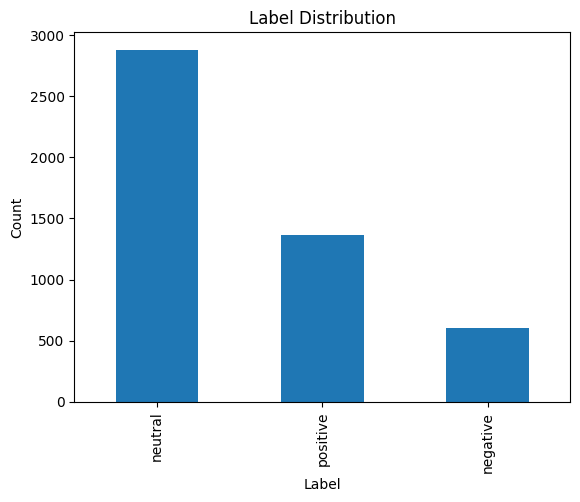

In [8]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


Most common words: [('eur', 1015), ('company', 971), ('said', 544), ('mn', 515), ('finnish', 512), ('sale', 501), ('million', 441), ('share', 435), ('profit', 413), ('net', 412), ('service', 339), ('finland', 337), ('group', 327), ('year', 323), ('operating', 299), ('2009', 297), ('mln', 288), ('market', 287), ('business', 286), ('2008', 283)]


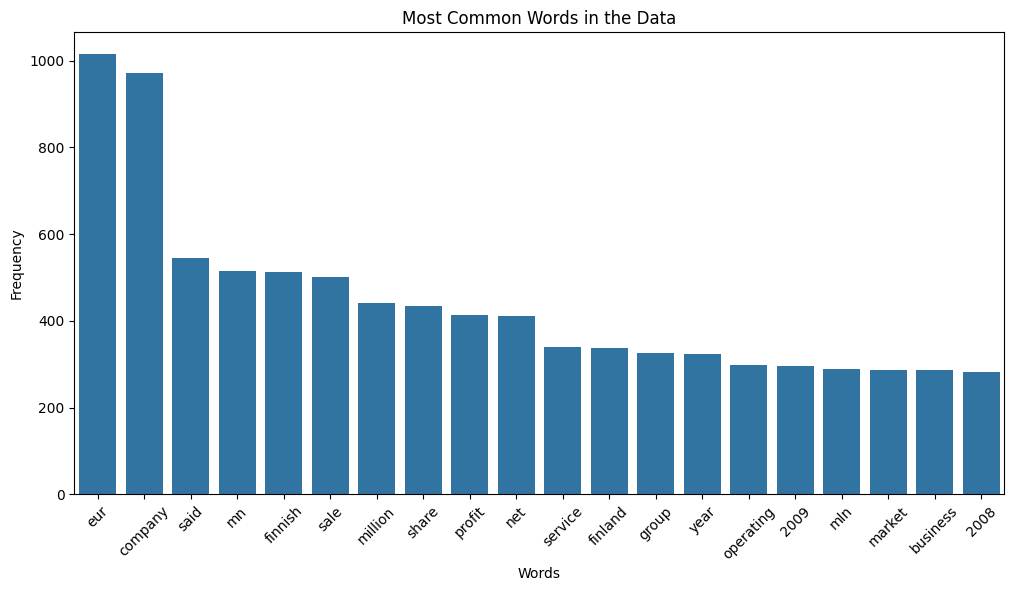

In [9]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Tokenizing the sentences into words
all_words = ' '.join(df['sentence']).split()

# Counting the frequency of each word
word_freq = Counter(all_words)

# Displaying the most common words (you can change the number as needed)
most_common_words = word_freq.most_common(20)
print("Most common words:", most_common_words)

# Visualizing the most common words (optional)
words, counts = zip(*most_common_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts))
plt.title('Most Common Words in the Data')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [10]:
# Removing common but less informative words
common_words_to_remove = ['eur', 'company', 'finnish', 'year', 'm', 'mln']  # You can adjust the list as needed
df['sentence'] = df['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in common_words_to_remove]))

# Removing duplicates if any
df = df.drop_duplicates()

# Checking for missing or empty values
df = df.dropna()  # Remove rows with missing values
df = df[df['sentence'].str.strip() != '']  # Remove rows with empty sentences

# Display the cleaned data
print(df.head())


                                            sentence     label
0  according gran plan move production russia alt...   neutral
1  technopolis plan develop stage area less 10000...   neutral
2  international electronic industry elcoteq laid...  negative
3  new production plant would increase capacity m...  positive
4  according updated strategy 20092012 basware ta...  positive


In [30]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['sentence'])

# Convert sentences to sequences of tokens
sequences = tokenizer.texts_to_sequences(df['sentence'])

# Pad the sequences to make all sentences the same length
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Display tokenizer information
word_index = tokenizer.word_index
print(f"Vocabulary size: {len(word_index)}")
print(f"Padded sequences shape: {padded_sequences.shape}")


Vocabulary size: 10312
Padded sequences shape: (4827, 46)


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features
X_tfidf = vectorizer.fit_transform(df['sentence'])

print(f"TF-IDF shape: {X_tfidf.shape}")


TF-IDF shape: (4827, 5000)


In [32]:
from sklearn.model_selection import train_test_split

# Prepare data
X = padded_sequences  # Tokenized and padded sequences
y = df['label']  # Labels

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (3861, 46)
Test data shape: (966, 46)


In [36]:
from sklearn.preprocessing import LabelEncoder
import numpy as np


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


y_train_encoded = np.array(y_train_encoded)
y_test_encoded = np.array(y_test_encoded)


In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.optimizers import Adam

vocab_size = len(word_index) + 1  # Vocabulary size
embedding_dim = 128  # Embedding dimension
input_length = max_length  # Length of input sequences
gru_units = 128  # GRU katmanındaki birim sayısı
dense_units = 64  # Dense katmanındaki birim sayısı
learning_rate = 0.001  # Öğrenme oranı
batch_size = 64  # Batch boyutu
epochs = 20  # Epoch sayısı

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
model.add(GRU(gru_units, return_sequences=False))  # Daha fazla birim ekledik
model.add(Dense(dense_units, activation='relu'))  # Dense katmanında daha fazla birim ekledik
model.add(Dense(3, activation='softmax'))  # 3 sınıf için çıktı katmanı

optimizer = Adam(learning_rate=learning_rate)  # Öğrenme oranını belirttik
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.5496 - loss: 0.9682 - val_accuracy: 0.6003 - val_loss: 0.9426
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6024 - loss: 0.9307 - val_accuracy: 0.6003 - val_loss: 0.9164
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5842 - loss: 0.9395 - val_accuracy: 0.6003 - val_loss: 0.9165
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5836 - loss: 0.9357 - val_accuracy: 0.6003 - val_loss: 0.9166
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5993 - loss: 0.9210 - val_accuracy: 0.6003 - val_loss: 0.9188
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6054 - loss: 0.9203 - val_accuracy: 0.6003 - val_loss: 0.9190
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5827 - loss: 0.9382 - val_accuracy: 0.6003 - val_loss: 0.9181
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5884 - loss: 0.9295 - val_accuracy: 0.6003 - v

In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Splitting data
X = padded_sequences  # Tokenized and padded sequences
y = df['label']  # Labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Applying SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Displaying resampled data distribution
from collections import Counter
print(f"Resampled dataset shape: {Counter(y_train_resampled)}")


Resampled dataset shape: Counter({'neutral': 2288, 'negative': 2288, 'positive': 2288})


In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.optimizers import Adam

vocab_size = len(word_index) + 1  # Vocabulary size
embedding_dim = 256  # Embedding dimension
input_length = max_length  # Length of input sequences
gru_units = 256  # GRU katmanındaki birim sayısı
dense_units = 64  # Dense katmanındaki birim sayısı
learning_rate = 0.005  # Öğrenme oranı
batch_size = 128  # Batch boyutu
epochs = 30  # Epoch sayısı

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
model.add(GRU(gru_units, return_sequences=False))  # Daha fazla birim ekledik
model.add(Dense(dense_units, activation='relu'))  # Dense katmanında daha fazla birim ekledik
model.add(Dense(3, activation='softmax'))  # 3 sınıf için çıktı katmanı

optimizer = Adam(learning_rate=learning_rate)  # Öğrenme oranını belirttik
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_10 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.5527 - loss: 1.0736 - val_accuracy: 0.6003 - val_loss: 0.9178
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.5888 - loss: 0.9298 - val_accuracy: 0.6003 - val_loss: 0.9344
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.6000 - loss: 0.9335 - val_accuracy: 0.6003 - val_loss: 0.9197
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.6056 - loss: 0.9176 - val_accuracy: 0.6003 - val_loss: 0.9204
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.5836 - loss: 0.9357 - val_accuracy: 0.6003 - val_loss: 0.9165
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.5885 - loss: 0.9367 - val_accuracy: 0.6003 - val_loss: 0.9177
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.5931 - loss: 0.9274 - val_accuracy: 0.6003 - val_loss: 0.9176
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.5897 - loss: 0.9309 - val_accuracy: 0.

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model hiperparametreleri
vocab_size = len(word_index) + 1  # Kelime dağarcığı büyüklüğü
embedding_dim = 512  # Gömme boyutu
input_length = max_length  # Giriş dizilerinin uzunluğu
gru_units = 256  # GRU katmanındaki birim sayısı
dense_units = 128  # Dense katmanındaki birim sayısı
learning_rate = 0.005  # Öğrenme oranı
batch_size = 128  # Batch boyutu
epochs = 40  # Epoch sayısı

# Modelin oluşturulması
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
model.add(GRU(gru_units, return_sequences=True))  # İlk GRU katmanı (daha derin yapı için return_sequences=True)
model.add(Dropout(0.3))  # Dropout eklenmesi
model.add(GRU(gru_units))  # İkinci GRU katmanı
model.add(Dense(dense_units, activation='relu'))
model.add(Dropout(0.3))  # İkinci Dropout katmanı
model.add(Dense(3, activation='softmax'))  # 3 sınıf için çıktı katmanı

# Modelin derlenmesi
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modelin özeti
model.summary()

# Modelin eğitilmesi
history = model.fit(X_train, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Modelin değerlendirilmesi
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_15 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_16 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 462ms/step - accuracy: 0.4464 - loss: 1.4124 - val_accuracy: 0.6003 - val_loss: 0.9268
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 431ms/step - accuracy: 0.5856 - loss: 0.9508 - val_accuracy: 0.6003 - val_loss: 0.9097
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 437ms/step - accuracy: 0.5979 - loss: 0.9244 - val_accuracy: 0.5162 - val_loss: 1.0450
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 440ms/step - accuracy: 0.5941 - loss: 0.8855 - val_accuracy: 0.6378 - val_loss: 0.8521
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 447ms/step - accuracy: 0.6774 - loss: 0.7502 - val_accuracy: 0.6468 - val_loss: 0.8768
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 490ms/step - accuracy: 0.7513 - loss: 0.5358 - val_accuracy: 0.6960 - val_loss: 1.0880
Epoch 7/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 478ms/step - accuracy: 0.7935 - loss: 0.5166 - val_accuracy: 0.6404 - val_loss: 0.9154
Epoch 8/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 476ms/step - accuracy: 0.8413 - loss: 0.4117 - val_accu

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model hiperparametreleri
vocab_size = len(word_index) + 1  # Kelime dağarcığı büyüklüğü
embedding_dim = 128  # Gömme boyutu
input_length = max_length  # Giriş dizilerinin uzunluğu
gru_units = 128  # GRU katmanındaki birim sayısı
dense_units = 128  # Dense katmanındaki birim sayısı
learning_rate = 0.01  # Öğrenme oranı
batch_size = 128  # Batch boyutu
epochs = 30  # Epoch sayısı

# Modelin oluşturulması
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
model.add(GRU(gru_units, return_sequences=True))  # İlk GRU katmanı (daha derin yapı için return_sequences=True)
model.add(Dropout(0.3))  # Dropout eklenmesi
model.add(GRU(gru_units))  # İkinci GRU katmanı
model.add(Dense(dense_units, activation='relu'))
model.add(Dropout(0.3))  # İkinci Dropout katmanı
model.add(Dense(3, activation='softmax'))  # 3 sınıf için çıktı katmanı

# Modelin derlenmesi
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modelin özeti
model.summary()

# Modelin eğitilmesi
history = model.fit(X_train, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Modelin değerlendirilmesi
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_21 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_27 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_28 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 0.4833 - loss: 1.1988 - val_accuracy: 0.6003 - val_loss: 0.9182
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.5961 - loss: 0.9322 - val_accuracy: 0.6003 - val_loss: 0.9246
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.5949 - loss: 0.9247 - val_accuracy: 0.6313 - val_loss: 0.8118
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.6636 - loss: 0.7283 - val_accuracy: 0.6572 - val_loss: 0.7603
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7802 - loss: 0.5233 - val_accuracy: 0.6753 - val_loss: 0.8517
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.8179 - loss: 0.3873 - val_accuracy: 0.6572 - val_loss: 1.0024
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.8566 - loss: 0.3310 - val_accuracy: 0.6895 - val_loss: 1.3334
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9246 - loss: 0.1953 - val_accuracy: 0.

In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model hiperparametreleri
vocab_size = len(word_index) + 1  # Kelime dağarcığı büyüklüğü
embedding_dim = 128  # Gömme boyutu
input_length = max_length  # Giriş dizilerinin uzunluğu
gru_units = 128  # GRU katmanındaki birim sayısı
dense_units = 512  # Dense katmanındaki birim sayısı
learning_rate = 0.01  # Öğrenme oranı
batch_size = 128  # Batch boyutu
epochs = 25  # Epoch sayısı

# Modelin oluşturulması
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
model.add(GRU(gru_units, return_sequences=True))  # İlk GRU katmanı (daha derin yapı için return_sequences=True)
model.add(Dropout(0.3))  # Dropout eklenmesi
model.add(GRU(gru_units))  # İkinci GRU katmanı
model.add(Dense(dense_units, activation='relu'))
model.add(Dropout(0.3))  # İkinci Dropout katmanı
model.add(Dense(3, activation='softmax'))  # 3 sınıf için çıktı katmanı

# Modelin derlenmesi
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modelin özeti
model.summary()

# Modelin eğitilmesi
history = model.fit(X_train, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Modelin değerlendirilmesi
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_45 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_75 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_68 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_76 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_69 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 223ms/step - accuracy: 0.4901 - loss: 1.6036 - val_accuracy: 0.6003 - val_loss: 0.9371
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.5895 - loss: 0.9533 - val_accuracy: 0.6003 - val_loss: 0.9421
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.5546 - loss: 0.9636 - val_accuracy: 0.6041 - val_loss: 0.8219
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.6544 - loss: 0.7548 - val_accuracy: 0.6339 - val_loss: 0.7954
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - accuracy: 0.7420 - loss: 0.5721 - val_accuracy: 0.5938 - val_loss: 1.0586
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 0.8120 - loss: 0.4394 - val_accuracy: 0.6378 - val_loss: 1.0662
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - accuracy: 0.8516 - loss: 0.3232 - val_accuracy: 0.6624 - val_loss: 1.0882
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - accuracy: 0.9136 - loss: 0.2349 - val_accuracy: 0.

In [114]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model hiperparametreleri
vocab_size = len(word_index) + 1  # Kelime dağarcığı büyüklüğü
embedding_dim = 128  # Gömme boyutu
input_length = max_length  # Giriş dizilerinin uzunluğu
gru_units = 128  # GRU katmanındaki birim sayısı
dense_units = 512  # Dense katmanındaki birim sayısı
learning_rate = 0.01  # Öğrenme oranı
batch_size = 128  # Batch boyutu
epochs = 25  # Epoch sayısı

# Modelin oluşturulması
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
model.add(GRU(gru_units, return_sequences=True))  # İlk GRU katmanı (daha derin yapı için return_sequences=True)
model.add(Dropout(0.3))  # Dropout eklenmesi
model.add(GRU(gru_units))  # İkinci GRU katmanı
model.add(Dense(dense_units, activation='relu'))
model.add(Dropout(0.3))  # İkinci Dropout katmanı
model.add(Dense(3, activation='softmax'))  # 3 sınıf için çıktı katmanı

# Modelin derlenmesi
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modelin özeti
model.summary()

# Modelin eğitilmesi
history = model.fit(X_train, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Modelin değerlendirilmesi
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_71 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_127 (GRU)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_120 (Dropout)           │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_128 (GRU)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_121 (Dropout)           │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 291ms/step - accuracy: 0.5078 - loss: 1.4855 - val_accuracy: 0.6003 - val_loss: 1.6571
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 265ms/step - accuracy: 0.5741 - loss: 1.0829 - val_accuracy: 0.6339 - val_loss: 0.8317
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - accuracy: 0.6740 - loss: 0.7362 - val_accuracy: 0.6261 - val_loss: 0.7834
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.7836 - loss: 0.4951 - val_accuracy: 0.6093 - val_loss: 0.9708
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step - accuracy: 0.8542 - loss: 0.3265 - val_accuracy: 0.6740 - val_loss: 1.3516
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 246ms/step - accuracy: 0.9538 - loss: 0.1540 - val_accuracy: 0.6856 - val_loss: 1.0792
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 284ms/step - accuracy: 0.9607 - loss: 0.1226 - val_accuracy: 0.7102 - val_loss: 1.3289
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 248ms/step - accuracy: 0.9812 - loss: 0.0617 - val_accuracy: 0

In [130]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model hiperparametreleri
vocab_size = len(word_index) + 1  # Kelime dağarcığı büyüklüğü
embedding_dim = 128  # Gömme boyutu
input_length = max_length  # Giriş dizilerinin uzunluğu
lstm_units = 256  # LSTM katmanındaki birim sayısı
dense_units = 256  # Dense katmanındaki birim sayısı
learning_rate = 0.01  # Öğrenme oranı
batch_size = 128  # Batch boyutu
epochs = 25  # Epoch sayısı

# Modelin oluşturulması
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
model.add(LSTM(lstm_units, return_sequences=True))  # İlk LSTM katmanı (daha derin yapı için return_sequences=True)
model.add(Dropout(0.3))  # Dropout eklenmesi
model.add(LSTM(lstm_units))  # İkinci LSTM katmanı
model.add(Dense(dense_units, activation='relu'))
model.add(Dropout(0.3))  # İkinci Dropout katmanı
model.add(Dense(3, activation='softmax'))  # 3 sınıf için çıktı katmanı

# Modelin derlenmesi
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modelin özeti
model.summary()

# Modelin eğitilmesi
history = model.fit(X_train, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Modelin değerlendirilmesi
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_88"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_87 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_32 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_152 (Dropout)           │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_33 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_176 (Dense)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_153 (Dropout)           │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_177 (Dense)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 463ms/step - accuracy: 0.4946 - loss: 1.1403 - val_accuracy: 0.6003 - val_loss: 0.9286
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 455ms/step - accuracy: 0.5776 - loss: 0.9519 - val_accuracy: 0.6003 - val_loss: 0.9174
Epoch 3/25
16/25 ━━━━━━━━━━━━━━━━━━━━ 4s 458ms/step - accuracy: 0.5609 - loss: 0.9820

KeyboardInterrupt: 